<a name="pagetop"></a>
<div style="width:1000 px">

<div style="float:right; width:98 px; height:98px;">
<img src="https://raw.githubusercontent.com/Unidata/MetPy/master/src/metpy/plots/_static/unidata_150x150.png" alt="Unidata Logo" style="height: 98px;">
</div>

<h1>Primer</h1>
<h3>Unidata Python Workshop</h3>

<div style="clear:both"></div>
</div>

<hr style="height:2px;">

<div style="float:right; width:250 px"><img src="http://www.contribute.geeksforgeeks.org/wp-content/uploads/numpy-logo1.jpg" alt="NumPy Logo" style="height: 250px;"></div>

### Questions
1. What are arrays?
2. How can arrays be manipulated effectively in Python?
3. How do we work with unit information with MetPy?

### Objectives
1. Slice and index the array
2. Perform a meteorological calculation on an array of data using MetPy.
3. Use advanced methods to index into arrays

### Resources
- [MetPy Documentation](https://unidata.github.io/MetPy/)
- [MetPy Calculation List](https://unidata.github.io/MetPy/api/generated/metpy.calc.html)
- [MetPy Constants](https://unidata.github.io/MetPy/api/generated/metpy.constants.html)

## 1. Index and slice arrays

Indexing is how we pull individual data items out of an array. Slicing extends this process to pulling out a regular set of the items.

In [1]:
# Convention for import to get shortened namespace
import numpy as np

In [2]:
# Create an array for testing
a = np.arange(12).reshape(3, 4)

In [3]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

Indexing in Python is 0-based, so the command below looks for the 2nd item along the first dimension (row) and the 3rd along the second dimension (column).

In [4]:
a[1, 2]

6

Can also just index on one dimension

In [5]:
a[2]

array([ 8,  9, 10, 11])

Negative indices are also allowed, which permit indexing relative to the end of the array.

In [6]:
a[0, -1]

3

Slicing syntax is written as `start:stop[:step]`, where all numbers are optional.
- defaults: 
  - start = 0
  - end = len(dim)
  - step = 1
- The second colon is also optional if no step is used.

It should be noted that end represents one past the last item; one can also think of it as a half open interval: `[start, end)`

In [7]:
# Get the 2nd and 3rd rows
a[1:3]

array([[ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [8]:
# All rows and 3rd column
a[:, 2]

array([ 2,  6, 10])

In [9]:
# ... can be used to replace one or more full slices
a[..., 2]

array([ 2,  6, 10])

In [10]:
# Slice every other row
a[::2]

array([[ 0,  1,  2,  3],
       [ 8,  9, 10, 11]])

In [11]:
# Slice out every other column
a[:, ::2]

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

In [12]:
# Slice every other item along each dimension -- how would we do this


<a href="#pagetop">Top</a>
<hr style="height:2px;">

## 2. Use units from MetPy with calculations

In [13]:
# Import MetPy's units registry
from metpy.units import units

In [14]:
length = 8 * units.feet
print(length * length)

64 foot ** 2


In [15]:
distance = 10 * units.mile
time = 15 * units.minute
avg_speed = distance / time
print(avg_speed)
print(avg_speed.to_base_units())
print(avg_speed.to('mph'))

0.6666666666666666 mile / minute
17.8816 meter / second
40.0 mile_per_hour


<a href="#pagetop">Top</a>
<hr style="height:2px;">

## 3. Perform meteorological calculations using MetPy

In [16]:
np.random.seed(19990503)  # So we all have the same data
u = np.random.randint(0, 45, 10) * units('m/s')
v = np.random.randint(0, 45, 10) * units('m/s')

In [17]:
print(u)
print(v)

[14.0 2.0 44.0 37.0 35.0 37.0 8.0 25.0 22.0 10.0] meter / second
[23.0 27.0 5.0 0.0 38.0 23.0 27.0 8.0 8.0 40.0] meter / second


In [18]:
import metpy.calc as mpcalc

speed = mpcalc.wind_speed(u, v)
direction = mpcalc.wind_direction(u, v)

In [19]:
print(speed)
print(np.rad2deg(direction))

[26.92582403567252 27.073972741361768 44.28317965096906 37.0 51.66236541235796 43.56604182158393 28.160255680657446 26.248809496813376 23.40939982143925 41.23105625617661] meter / second
[211.32869286780416 184.23639479905884 263.5169263071027 270.0 222.6467031338917 238.13402230639628 196.50436138175502 252.2553283749431 250.01689347810003 194.03624346792648] degree


In [20]:
print(np.mean(speed))

34.95609049170319 meter / second


In [21]:
print(np.mean(np.rad2deg(direction)))
print(np.std(np.rad2deg(direction)))

228.2675566116978 degree
29.27089778050201 degree


Let's use MetPy to calculate the dewpoint from the current temperature and relative humidity:

In [22]:
import metpy.calc as mpcalc
mpcalc.dewpoint_rh(25 * units.degC, 0.75)

/home/travis/miniconda/envs/unidata/lib/python3.7/site-packages/metpy/xarray.py:655: MetpyDeprecationWarning: The dewpoint_rh function was deprecated in version 0.12. This function has been renamed dewpoint_from_relative_humidity.
  return func(*args, **kwargs)


20.264799097790046 <Unit('degree_Celsius')>

Thanks to units, this can work with Fahrenheit as well:

In [23]:
td = mpcalc.dewpoint_rh(77 * units.degF, 0.75)
td

20.264799097790082 <Unit('degree_Celsius')>

And you can get it back in Fahrenheit as:

In [24]:
td.to('degF')

68.47663837602212 <Unit('degree_Fahrenheit')>

MetPy also has a library of useful constants, similar to those in `scipy.constants`, that are important for meteorology and have appropriate dimensionality included:

In [25]:
import metpy.constants as consts

We can look at the docstring for the module (or go to the web documentation) to see a list of the available contants:

In [26]:
consts?

So for the density of liquid water (nominally at 0C), we can use:

In [27]:
consts.density_water

1000.0 <Unit('kilogram / meter ** 3')>

Or for a more symbolic and shorter notation, you can also use:

In [28]:
consts.rho_l

1000.0 <Unit('kilogram / meter ** 3')>

<div class="alert alert-success">
    <b>EXERCISE</b>:
     <ul>
         <li>Using the function pressure_to_height_std, can you calculate the height of the 700 millibar level assuming a standard atmosphere?</li>
         <li>What is the windchill when the temperature is 263K and the winds are blowing at 20 m/s? (Bonus points: find it in Fahrenheit)</li>
         <li>Using only values from metpy.constants, what is the dry adiabatic lapse rate? ($\Gamma_d = \frac{g}{C_{pd}}$)</li>
    </ul>
</div>

In [29]:
# YOUR CODE GOES HERE

<div class="alert alert-info">
    <b>SOLUTION</b>
</div>

In [30]:
# %load solutions/basic_calcs.py

# Cell content replaced by load magic replacement.
# The height of the 700 millibar level assuming a standard atmosphere
height_700 = mpcalc.pressure_to_height_std(700 * units.hPa)
print(height_700)

# Windchill of 263K ambient temperature with 20 m/s wind
windchill = mpcalc.windchill(263 * units.kelvin, 20 * units('m/s'))
print(windchill.to('degF'))

# Calculate the dry adiabatic lapse rate
gamma_d = consts.g / consts.Cp_d
print(gamma_d)


3.01066437120362 kilometer
-10.668929988082516 degree_Fahrenheit
0.009757860696517412 kelvin / meter


<a href="#pagetop">Top</a>
<hr style="height:2px;">

## 4. Advanced NumPy Indexing
### Boolean indexing
Numpy can easily create arrays of boolean values and use those to select certain values to extract from an array

In [31]:
# Create some synthetic data representing temperature and wind speed data
np.random.seed(19990503)  # Make sure we all have the same data
temp = (20 * np.cos(np.linspace(0, 2 * np.pi, 100)) +
        50 + 2 * np.random.randn(100)) * units.degC
spd = (np.abs(10 * np.sin(np.linspace(0, 2 * np.pi, 100)) +
              10 + 5 * np.random.randn(100))) * units('m/s')

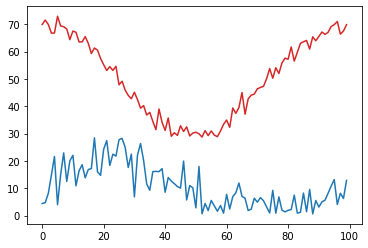

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(temp.m, 'tab:red')
plt.plot(spd.m, 'tab:blue');

By doing a comparision between a NumPy array and a value, we get an
array of values representing the results of the comparison between
each element and the value

In [33]:
temp > 45 * units.degC

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

We can take the resulting array and use this to index into the
NumPy array and retrieve the values where the result was true

In [34]:
print(temp[temp > 45 * units.degC])

[69.89825854468695 71.5231390544147 69.90028362590098 66.73828667384615 66.77980232998364 72.91468563618255 69.34603239413326 69.09533590631038 68.2735081392093 64.33916720548858 67.4949779142604 67.05282371849528 63.51829517951234 63.54034677963958 65.46576462733442 62.996838357013445 59.27662303864156 61.29361271838587 60.51641586088817 57.46048994579791 55.19793003898835 53.07572989150042 54.47998157597634 53.09552107060414 54.590372687230435 47.842727474509566 49.14355890447 45.8715153379708 45.11976793782281 45.00929200146848 46.36021140814746 46.875574250305796 47.25668992379094 50.09599544270616 53.77789357720774 50.240731969559164 54.07629058706518 51.950652023730086 55.84827793990396 57.56967085824631 57.19572063208609 61.67658285227772 56.51474577091502 59.72166924107163 62.99403255786523 63.57569452506213 64.0598423217658 60.882586433600125 65.37759899250176 63.94115754334744 65.53070255606218 67.15175649273331 66.26468701023049 67.0381179338415 69.17773618070007 69.83571708

So long as the size of the boolean array matches the data, the boolean array can come from anywhere

In [35]:
print(temp[spd > 10 * units('m/s')])

[66.73828667384615 66.77980232998364 69.34603239413326 69.09533590631038 68.2735081392093 64.33916720548858 67.4949779142604 67.05282371849528 63.51829517951234 63.54034677963958 65.46576462733442 62.996838357013445 59.27662303864156 61.29361271838587 60.51641586088817 57.46048994579791 55.19793003898835 53.07572989150042 54.47998157597634 53.09552107060414 54.590372687230435 47.842727474509566 49.14355890447 45.8715153379708 43.95971515711935 42.72814761853248 42.45316174918564 39.279751697339314 40.233519377882125 36.77179678083506 34.433292285358405 31.422776123832897 38.97505745136671 34.105495749878514 35.70826448330276 29.012760684628027 30.311809346299665 29.31602671228388 32.845804535209695 30.766953091382078 29.113447159842654 30.166525713638762 29.9151304875085 39.517843886525874 69.17773618070007 69.83571708044737 69.83593609282478] degree_Celsius


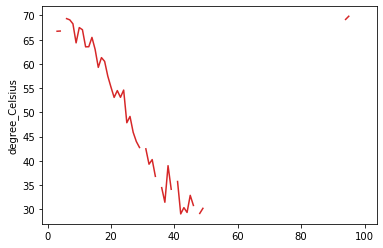

In [36]:
# Make a copy so we don't modify the original data
temp2 = temp.copy()

# Replace all places where spd is <10 with NaN (not a number) so matplotlib skips it
temp2[spd < 10 * units('m/s')] = np.nan * units.degC
plt.plot(temp2, 'tab:red')

Can also combine multiple boolean arrays using the syntax for bitwise operations. **MUST HAVE PARENTHESES** due to operator precedence.

In [37]:
print(temp[(temp < 45 * units.degC) & (spd > 10 * units('m/s'))])

[43.95971515711935 42.72814761853248 42.45316174918564 39.279751697339314 40.233519377882125 36.77179678083506 34.433292285358405 31.422776123832897 38.97505745136671 34.105495749878514 35.70826448330276 29.012760684628027 30.311809346299665 29.31602671228388 32.845804535209695 30.766953091382078 29.113447159842654 30.166525713638762 29.9151304875085 39.517843886525874] degree_Celsius


### Arrays of indices

You can also use a list or array of indices to extract particular values--this is a natural extension of the regular indexing. For instance, just as we can select the first element:

In [38]:
print(temp[0])

69.89825854468695 degree_Celsius


We can also extract the first, fifth, and tenth elements:

In [39]:
print(temp[[0, 4, 9]])

[69.89825854468695 66.77980232998364 64.33916720548858] degree_Celsius


One of the ways this comes into play is trying to sort numpy arrays using `argsort`. This function returns the indices of the array that give the items in sorted order. So for our temp "data":

In [40]:
inds = np.argsort(temp)
print(inds)

[52 57 42 48 54 44 56 51 49 43 50 46 58 55 53 40 37 61 47 45 59 39 36 60
 41 34 66 63 35 38 32 62 64 33 31 67 29 28 68 69 65 30 27 70 71 72 25 26
 73 75 77 21 23 74 76 22 24 20 78 82 80 19 79 16 83 18 87 17 81 84 15 12
 13 85 89 86  9 88 14 90 92 97  3  4 93 11 91 10 98  8  7 94  6 95 99  0
  2 96  1  5]


We can use this array of indices to pass into temp to get it in sorted order:

In [41]:
print(temp[inds])

[28.718282038323036 28.85269149038033 29.012760684628027 29.113447159842654 29.251861637220156 29.31602671228388 29.427963807265506 29.9151304875085 30.166525713638762 30.311809346299665 30.48608715235223 30.766953091382078 30.93380275283696 30.958143915002044 31.071999626534367 31.134141096889948 31.422776123832897 32.27369636009039 32.4492768437443 32.845804535209695 33.375737130323344 34.105495749878514 34.433292285358405 34.95696913767817 35.70826448330276 36.77179678083506 37.0695433492411 37.39853292612909 37.74533670280897 38.97505745136671 39.279751697339314 39.34620461421512 39.517843886525874 40.233519377882125 42.45316174918564 42.69583703084014 42.72814761853248 43.95971515711935 44.03576452873479 44.45775806330646 45.00929200146848 45.11976793782281 45.8715153379708 46.36021140814746 46.875574250305796 47.25668992379094 47.842727474509566 49.14355890447 50.09599544270616 50.240731969559164 51.950652023730086 53.07572989150042 53.09552107060414 53.77789357720774 54.07629058

Or we can slice `inds` to only give the 10 highest temperatures:

In [42]:
ten_highest = inds[-10:]
print(temp[ten_highest])

[69.09533590631038 69.17773618070007 69.34603239413326 69.83571708044737 69.83593609282478 69.89825854468695 69.90028362590098 70.99586741800682 71.5231390544147 72.91468563618255] degree_Celsius


There are other numpy arg functions that return indices for operating:

In [43]:
np.*arg*?

<div class="alert alert-success">
    <b>EXERCISE</b>:

Heat index is only defined for temperatures >= 80F and relative humidity values >= 40%. Using the data generated below, use boolean indexing to extract the data where heat index has a valid value.
</div>

In [44]:
# Our import for numpy and metpy
import numpy as np
import matplotlib.pyplot as plt
from metpy.units import units

# Here's the "data"
np.random.seed(19990503)  # Make sure we all have the same data
temp = (20 * np.cos(np.linspace(0, 2 * np.pi, 100)) +
        80 + 2 * np.random.randn(100)) * units.degF
rh = (np.abs(20 * np.cos(np.linspace(0, 4 * np.pi, 100)) +
              50 + 5 * np.random.randn(100))) * units('percent')


# Create a mask for the two conditions described above
# good_heat_index = 



# Use this mask to grab the temperature and relative humidity values that together
# will give good heat index values
# temp[] ?


# BONUS POINTS: Plot only the data where heat index is defined by
# inverting the mask (using `~mask`) and setting invalid values to np.nan

<div class="alert alert-info">
    <b>SOLUTION</b>
</div>

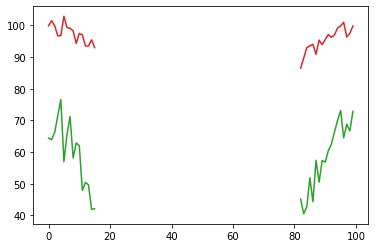

In [45]:
# %load solutions/boolean_indexing.py

# Cell content replaced by load magic replacement.
# Our import for numpy and metpy
import numpy as np
import matplotlib.pyplot as plt
from metpy.units import units

# Here's the "data"
np.random.seed(19990503)  # Make sure we all have the same data
temp = (20 * np.cos(np.linspace(0, 2 * np.pi, 100)) +
        80 + 2 * np.random.randn(100)) * units.degF
rh = (np.abs(20 * np.cos(np.linspace(0, 4 * np.pi, 100)) +
              50 + 5 * np.random.randn(100))) * units('percent')

# Create a mask for the two conditions described above
good_heat_index = (temp >= 80 * units.degF) & (rh >= 40 * units.percent)

# Use this mask to grab the temperature and relative humidity values that together
# will give good heat index values
hi_temps = temp[good_heat_index]
hi_rh = rh[good_heat_index]

# BONUS POINTS: Plot only the data where heat index is defined by
# inverting the mask (using `~mask`) and setting invalid values to np.nan
temp[~good_heat_index] = np.nan
rh[~good_heat_index] = np.nan

plt.plot(temp.m, color='tab:red')
plt.plot(rh.m, color='tab:green')


<a href="#pagetop">Top</a>
<hr style="height:2px;">